<a href="https://colab.research.google.com/github/vandien201462C/week5/blob/main/dkmotorservo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=6362f60abebdd83715b313c5983549de8c9a0c461b7362ab29ab7fe3083c5e56
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


59.75468975468975


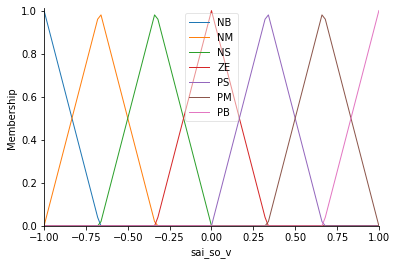

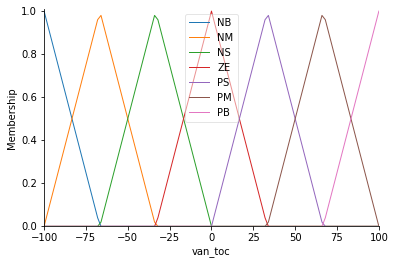

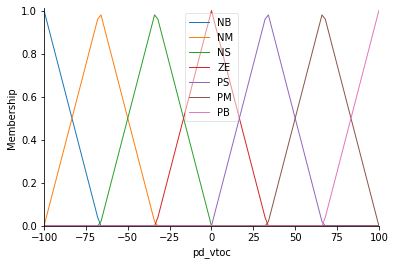

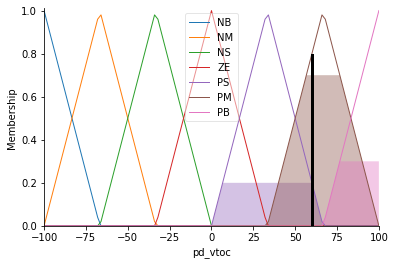

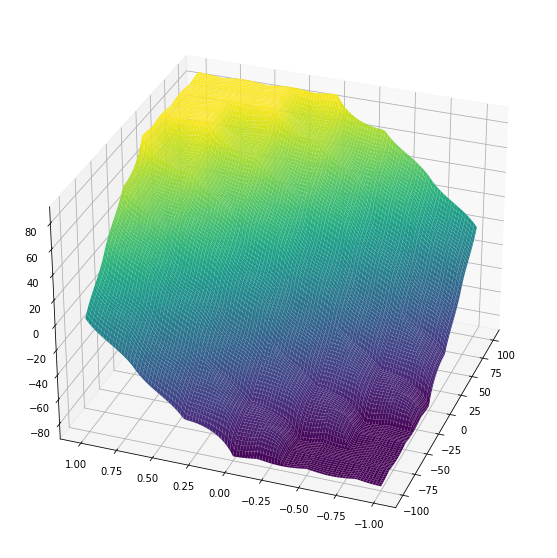

In [ ]:
# đk motor servo
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

universe0 = np.linspace(-100,100,101)
universe1 = np.linspace(-1,1,101)
universe2 = np.linspace(-100,100,101)
#Input
E =ctrl.Antecedent(universe0,'van_toc')
CE=ctrl.Antecedent(universe1,'sai_so_v')
#Output
SP=ctrl.Consequent(universe2,'pd_vtoc')

name=['NB','NM','NS','ZE','PS','PM','PB']

CE.automf(names=name)
E.automf(names=name)
SP.automf(names=name)

CE.view()
E.view()
SP.view()

rule = []

rule.append(ctrl.Rule(antecedent=((CE['NB'] & E['NB'])|(CE['NB'] & E['NM'])|
                                  (CE['NB'] & E['NS'])|(CE['NB'] & E['ZE'])|
                                  (CE['NM'] & E['NB'])|(CE['NM'] & E['NM'])|
                                  (CE['NM'] & E['NS'])|(CE['NS'] & E['NB'])|
                                  (CE['NS'] & E['NM'])|(CE['ZE'] & E['NB']))
                                  ,consequent=SP['NB'],label='rule NB'))

rule.append(ctrl.Rule(antecedent=((CE['NB'] & E['PS'])|(CE['NM'] & E['ZE'])|
                                  (CE['NS'] & E['NS'])|(CE['ZE'] & E['NM'])|
                                  (CE['PS'] & E['NB'])),consequent=SP['NM'],label='rule NM'))

rule.append(ctrl.Rule(antecedent=((CE['NB'] & E['PM'])|(CE['NM'] & E['PS'])|
                                  (CE['NS'] & E['ZE'])|(CE['ZE'] & E['NS'])|
                                  (CE['PS'] & E['NM'])|(CE['PM'] & E['NB']))
                                  ,consequent=SP['NS'],label='rule NS'))

rule.append(ctrl.Rule(antecedent=((CE['NB'] & E['PB'])|(CE['NM'] & E['PM'])|
                                  (CE['NS'] & E['PS'])|(CE['ZE'] & E['ZE'])|
                                  (CE['PS'] & E['NS'])|(CE['PM'] & E['NM'])|
                                  (CE['PB'] & E['NB'])),consequent=SP['ZE'],label='rule ZE'))

rule.append(ctrl.Rule(antecedent=((CE['NM'] & E['PB'])|(CE['NS'] & E['PM'])|
                                  (CE['ZE'] & E['PS'])|(CE['PS'] & E['ZE'])|
                                  (CE['PM'] & E['NS'])|(CE['PB'] & E['NM']))
                                  ,consequent=SP['PS'],label='rule PS'))

rule.append(ctrl.Rule(antecedent=((CE['NS'] & E['PB'])|(CE['ZE'] & E['PM'])|
                                  (CE['PS'] & E['PS'])|(CE['PM'] & E['ZE'])|
                                  (CE['PB'] & E['NS'])),consequent=SP['PM'],label='rule PM'))

rule.append(ctrl.Rule(antecedent=((CE['PB'] & E['PB'])|(CE['PM'] & E['PB'])|
                                  (CE['PS'] & E['PB'])|(CE['ZE'] & E['PB'])|
                                  (CE['PB'] & E['PM'])|(CE['PM'] & E['PM'])|
                                  (CE['PS'] & E['PM'])|(CE['PB'] & E['PS'])|
                                  (CE['PM'] & E['PS'])|(CE['PB'] & E['ZE']))
                                  ,consequent=SP['PB'],label='rule PB'))

#Control system
SPEED_ctrl = ctrl.ControlSystem(rule)
SP_sim=ctrl.ControlSystemSimulation(SPEED_ctrl)

SP_sim.input['van_toc'] = 60
SP_sim.input['sai_so_v'] = 0.1
SP_sim.compute()
print(SP_sim.output['pd_vtoc'])
SP.view(sim = SP_sim)
# vẽ 3d 
d_ctrl = ctrl.ControlSystem(rule)
d_simulation=ctrl.ControlSystemSimulation(d_ctrl)
upsampled1=np.linspace(-100,100,101)
upsampled2=np.linspace(-1,1,101)
x,y = np.meshgrid(upsampled1,upsampled2)
z = np.zeros_like(x)

for i in range(101):
  for j in range(101):
    d_simulation.input['van_toc']=x[i,j]
    d_simulation.input['sai_so_v']=y[i,j]
    d_simulation.compute()
    z[i,j]=d_simulation.output['pd_vtoc']

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z,rstride=1,cstride=1,cmap='viridis',linewidth=0.4,antialiased=True)
ax.view_init(30,200)
